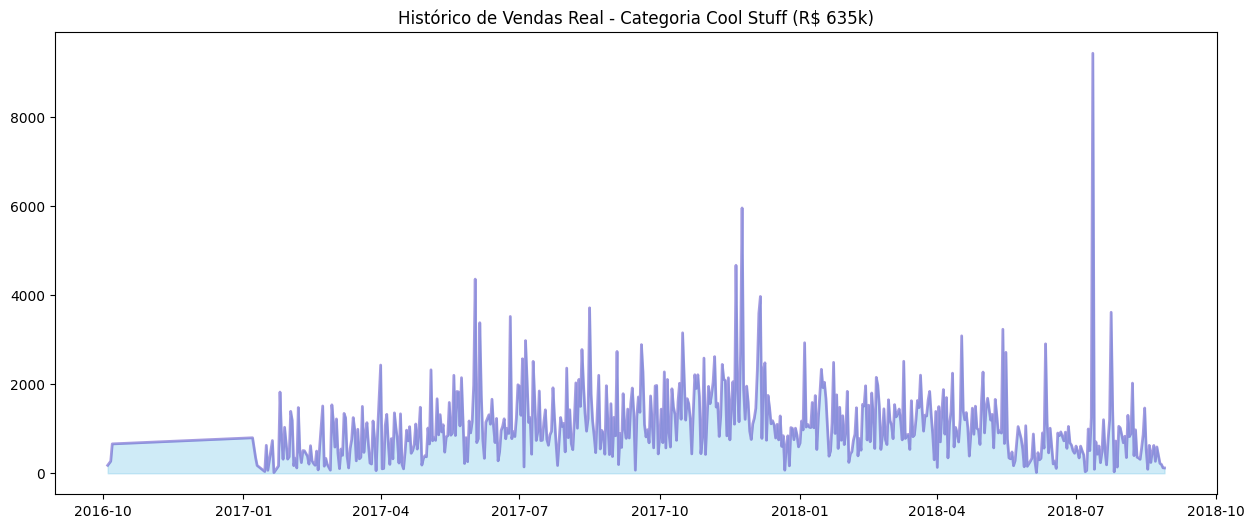

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 1. Carrega o arquivo que você salvou no notebook anterior
df = pd.read_csv('base_completa_limpa.csv')

# 2. Garante que a data seja reconhecida como data (o CSV salva como texto)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


df_category = df[df['item'] == 'cool_stuff']


df_sales_day = df_category.groupby('date_only')['sells'].sum().reset_index()


df_mensal = df_category.set_index('order_purchase_timestamp').resample('ME')['sells'].sum().reset_index()




df_exploracao = pd.read_csv('vendas_consolidadas.csv')
df_exploracao['date_only'] = pd.to_datetime(df_exploracao['date_only'])

df_plot = df_exploracao[df_exploracao['item'] == 'cool_stuff'].groupby('date_only')['sells'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.fill_between(df_plot['date_only'], df_plot['sells'], color="skyblue", alpha=0.4)
plt.plot(df_plot['date_only'], df_plot['sells'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Histórico de Vendas Real - Categoria Cool Stuff (R$ 635k)')
plt.show()

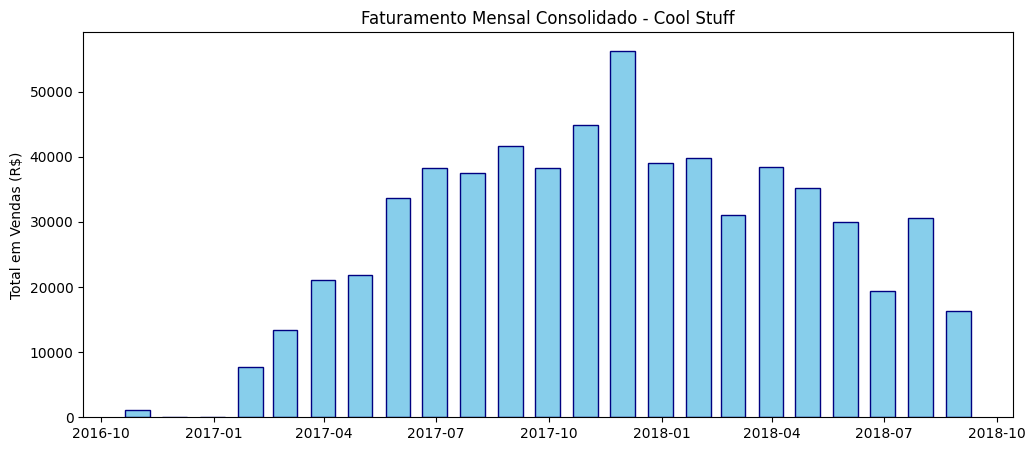

In [5]:
# Transformando os dados diários em mensais para ver a tendência limpa

plt.figure(figsize=(12, 5))
plt.bar(df_mensal['order_purchase_timestamp'], df_mensal['sells'], width=20, color='skyblue', edgecolor='navy')
plt.title('Faturamento Mensal Consolidado - Cool Stuff')
plt.ylabel('Total em Vendas (R$)')
plt.show()

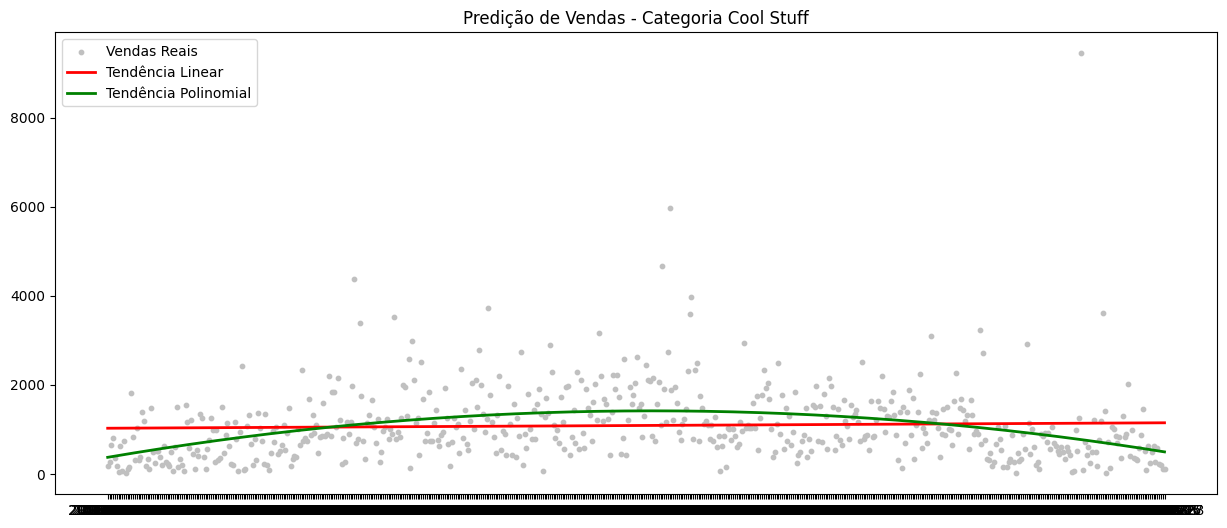

In [6]:
# 2. Criar a variável X (dias) e Y (vendas)
df_sales_day['day_count'] = np.arange(len(df_sales_day))
X = df_sales_day[['day_count']]
y = df_sales_day['sells']

# 3. Treinar Regressão Linear (Reta)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 4. Treinar Regressão Polinomial (Curva de Grau 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# 5. Visualização Comparativa
plt.figure(figsize=(15, 6))
plt.scatter(df_sales_day['date_only'], y, color='silver', label='Vendas Reais', s=10)
plt.plot(df_sales_day['date_only'], y_pred_lin, color='red', label='Tendência Linear', linewidth=2)
plt.plot(df_sales_day['date_only'], y_pred_poly, color='green', label='Tendência Polinomial', linewidth=2)

plt.title('Predição de Vendas - Categoria Cool Stuff')
plt.legend()
plt.show()